In [1]:
#Подключим базу данных фильмов
import sqlite3
import pandas as pd
con = sqlite3.connect('imdb_small.db')
cur = con.cursor()

In [2]:
#Запишем название фильма, год выпуска и оценку фильма
titles_dates_rates = [
    ['Avatar', '2009', '10'], ['Deadpool 2', '2018', '7'], ['Black Panther', '2018', '8'], ['Logan', '2017', '9'], 
    ['Star Wars: Episode VIII - The Last Jedi', '2017', '5'], ['The Mummy', '2017', '6'], ['Joker', '2019', '10'],
    ['Captain Marvel', '2019', '4'], ['Ford v Ferrari', '2019', '10'], ['Alita: Battle Angel', '2019', '3'], 
    ['La La Land', '2016', '1'], ['Zootopia', '2016', '10'], ['Passengers', '2016', '8'], ['The Shallows', '2016', '7'],
    ['The 5th Wave', '2016', '2']
]

In [3]:
#Создадим  таблицу с названием my_films, состоящую из id фильма (первичный ключ), 
#его названия, даты премьеры и моего рейтинга, а затем сохраним:
cur.execute("""
CREATE TABLE my_films_films (
    title_id INT, 
    title TEXT, 
    premiered INT,
    rating REAL,
    PRIMARY KEY (title_id)
)
""")

con.commit()

In [4]:
#Сделаем выборку из общей таблицы и добавим в запрос переменные (название фильма и год премьеры):
my_films_query_1 = """
SELECT title_id, title, premiered
FROM titles
WHERE title = ? AND titles.premiered = ?
"""

In [5]:
#Вернемся к  списку просмотренных фильмов. 
#Для каждого из них сделаем запрос и получим необходимые данные, а потом добавим к ним наш рейтинг:
data = []
for i in titles_dates_rates:
    title = i[0]
    date = i[1]
    rate = i[2]
    
    cur.execute(my_films_query_1, (title, date))
    line = cur.fetchone()
    d = (line[0], line[1], line[2], rate)
    data.append(d)

data

[(499549, 'Avatar', 2009, '10'),
 (5463162, 'Deadpool 2', 2018, '7'),
 (1825683, 'Black Panther', 2018, '8'),
 (3315342, 'Logan', 2017, '9'),
 (2527336, 'Star Wars: Episode VIII - The Last Jedi', 2017, '5'),
 (2345759, 'The Mummy', 2017, '6'),
 (7286456, 'Joker', 2019, '10'),
 (4154664, 'Captain Marvel', 2019, '4'),
 (1950186, 'Ford v Ferrari', 2019, '10'),
 (437086, 'Alita: Battle Angel', 2019, '3'),
 (3783958, 'La La Land', 2016, '1'),
 (2948356, 'Zootopia', 2016, '10'),
 (1355644, 'Passengers', 2016, '8'),
 (4052882, 'The Shallows', 2016, '7'),
 (2304933, 'The 5th Wave', 2016, '2')]

In [6]:
#Добавим в уже созданную таблицу данные и сохраним:
cur.executemany("INSERT INTO my_films_films VALUES (?, ?, ?, ?)", data)
con.commit()

In [7]:
#Снова подключим базу данных фильмов IMDb:
con = sqlite3.connect('imdb_small_indexed.db')
cur = con.cursor()

In [8]:
#Сделаем запрос: выбрать фильмы, выпущенные в промежутке 1940-1950 годов, которые длятся больше 80 минут. 
#Вывести 50 таких фильмов:
indexed1_query = """
SELECT title, premiered, rating, runtime_min
FROM titles
    JOIN rating ON titles.title_id = rating.title_id
WHERE premiered <= 1950 AND premiered >= 1940 AND runtime_min > 80
LIMIT 50
"""

cur.execute(indexed1_query)
d1 = cur.fetchall()
print('Число строк:', len(d1))
d1

Число строк: 50


[('Houkutuslintu', 1946, 5.9, 84),
 ('August järjestää kaiken', 1942, 6.1, 95),
 ('My Favorite Wife', 1940, 7.4, 88),
 ('Odygdens belöning', 1944, 5.5, 83),
 ('Altes Herz geht auf die Reise', 1947, 6.5, 87),
 ('El fanfarrón: ¡Aquí llegó el valentón!', 1940, 7.5, 83),
 ('Narcisse', 1940, 5.2, 95),
 ('Szüts Mara házassága', 1941, 5.9, 91),
 ('Band Waggon', 1940, 5.5, 85),
 ('Beating Heart', 1940, 6.8, 97),
 ('Centomila dollari', 1940, 5.3, 83),
 ("Devil's Daughter", 1946, 7.1, 105),
 ('Familjen Björck', 1940, 5.7, 98),
 ('French Without Tears', 1940, 7.0, 86),
 ('Földindulás', 1940, 6.7, 92),
 ('Füszer és csemege', 1940, 6.9, 85),
 ('Gaslight', 1940, 7.3, 84),
 ('The Green Hornet', 1940, 6.8, 258),
 ('I Take This Woman', 1940, 6.4, 98),
 ('Los de abajo', 1940, 7.2, 89),
 ('Gambling Hell', 1942, 6.7, 90),
 ('La malquerida', 1940, 6.7, 94),
 ('The Man from Down Under', 1943, 6.0, 103),
 ('Ein Mann auf Abwegen', 1940, 6.7, 88),
 ('The Middle Watch', 1940, 6.3, 87),
 ('Motel the Operator', 1

In [9]:
#Сделаем запрос: вывести актеров и максимальную, минимальную и среднюю длительность фильмов, в которых они снимались.
indexed2_query = """
SELECT 
    name,
    MAX(runtime_min) as max_run,
    MIN(runtime_min) as min_run,
    ROUND(AVG(runtime_min), 1) as a_run
FROM titles
    JOIN crew ON titles.title_id = crew.title_id
    JOIN people ON crew.person_id = people.person_id
WHERE name IN ('Tom Cruise', 'Jason Statham', 'Arnold Schwarzenegger', 'Bruce Willis', 'Bruce Lee')
GROUP BY name
"""

cur.execute(indexed2_query)
d2 = cur.fetchall()
print('Число строк:', len(d2))
d2

Число строк: 5


[('Arnold Schwarzenegger', 141, 25, 93.6),
 ('Bruce Lee', 130, 45, 91.9),
 ('Bruce Willis', 154, 30, 102.9),
 ('Jason Statham', 137, 83, 104.0),
 ('Tom Cruise', 500, 30, 118.9)]

In [10]:
#Сделаем запрос: вывести фильмы, выпущенные позже 2018 года, и список играющих в нем актеров, если их не больше 3.
indexed3_query = """
SELECT title, premiered, rating, COUNT(people.person_id) as n_actors, GROUP_CONCAT(people.name, ', ') as actors
FROM titles
    JOIN crew ON titles.title_id = crew.title_id
    JOIN people ON crew.person_id = people.person_id
    JOIN rating ON titles.title_id = rating.title_id
WHERE premiered > 2018
GROUP BY titles.title_id
HAVING n_actors <= 3
LIMIT 20
"""

cur.execute(indexed3_query)
d3 = cur.fetchall()

print('Число строк:', len(d3))
d3

Число строк: 20


[('Bucharest Memories', 2020, 7.2, 1, 'Radu Gabrea'),
 ('Entertainment Tonight/Weekend Edition/International',
  2019,
  6.7,
  2,
  'Keltie Knight, Arlene Santana'),
 ('Shellmont', 2019, 5.9, 2, 'Rob Servidone, Gus Trapani'),
 ('Hotel Camarillo', 2019, 5.0, 1, 'Wayne Poe'),
 ('One Mind', 2019, 7.0, 2, 'Edward A. Burger, Agnes Lam'),
 ('Merchants of the Wild',
  2019,
  9.4,
  2,
  'Falen Johnson, Caleb Kinew Nini Musgrave'),
 ('Fly High: Story of the Disc Dog',
  2019,
  9.2,
  2,
  'Lindsay Thompson, Christopher Laforet'),
 ('Minder of the Mind', 2019, 3.9, 1, 'John H. Shelton'),
 ('Agents Unknown',
  2019,
  7.9,
  3,
  'John Murphy, Michael Reiter, Stephan Mazurek'),
 ('Paranoia', 2019, 3.8, 2, 'Evgeniy Mishukhin, Sergey A.'),
 ('Grabiteli', 2019, 1.8, 3, 'Sergey A., Evgeniy Mishukhin, Firz'),
 ('Cast Away',
  2019,
  4.1,
  3,
  'Paul Gustovich, Vitaliy Versace, David L. Walker'),
 ('UnDeadDeat Dad', 2020, 7.8, 1, 'Paul Overacker'),
 ('Cinema Twain', 2019, 7.4, 1, 'Val Kilmer'),
 

In [11]:
#Построим график по запросу: вывести количество фильмов, выпущенных в 2010-2020 годах:
indexed4_query = """
SELECT premiered, COUNT(premiered) as n_year
FROM titles

WHERE premiered >= 2010
GROUP BY premiered
HAVING n_year > 5000
"""

cur.execute(indexed4_query)
data = cur.fetchall()
data

[(2010, 18737),
 (2011, 21205),
 (2012, 23455),
 (2013, 24854),
 (2014, 26528),
 (2015, 28145),
 (2016, 29553),
 (2017, 30188),
 (2018, 29505),
 (2019, 27627),
 (2020, 23421)]

In [12]:
#Разделим полученные данные, чтобы потом добавить их в график:
years = []
amount = []
for i in data:
    years.append(i[0])
    amount.append(i[1])

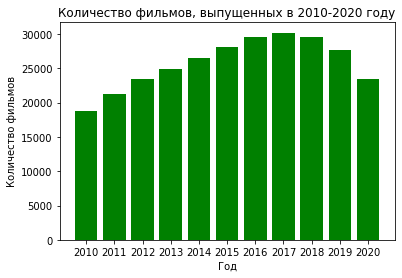

In [13]:
#Импортируем модуль _matplotlib_ и построим bar plot:
import matplotlib.pyplot as plt

plt.bar(years, amount, color='green')
plt.xticks(ticks=years, labels=years)
plt.title('Количество фильмов, выпущенных в 2010-2020 году')
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()